In [1]:
# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('dark_background')

#  Reading CSV

In [3]:
df = pd.read_csv('../input/swiggys-top-rated-restaurants-in-delhi/rest_delhi1.csv')
df.head()

,name,cuisine,location,rating,num_of_rating,price_for_two
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


In [4]:
df.shape

(912, 6)

In [5]:
df.columns

Index(['name', 'cuisine', 'location', 'rating', 'num_of_rating',
       'price_for_two'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           912 non-null    object
 1   cuisine        912 non-null    object
 2   location       912 non-null    object
 3   rating         912 non-null    object
 4   num_of_rating  912 non-null    object
 5   price_for_two  912 non-null    object
dtypes: object(6)
memory usage: 42.9+ KB


# Dropping Duplicates

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(764, 6)

# Data Cleaning 

## Cleaning rating column

In [8]:
df['rating'].unique()

array(['4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4.0', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3.0',
       '2.9', '2.8', '2.7', '2.3', '2.2', '--'], dtype=object)

# Removing '--' from rating column

In [9]:
def handlerating(value):
    if value=='--':
        return np.nan
    else:
        return float(value)
    
df['rating'] = df['rating'].apply(handlerating)
df['rating'].head()

0    4.7
1    4.7
2    4.7
3    4.7
4    4.6
Name: rating, dtype: float64

In [10]:
df.rating.isnull().sum()

316

# Filling Null values in Rating column with Mean

In [11]:
df['rating'].fillna(df['rating'].mean(), inplace = True)
df['rating'].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    object 
 5   price_for_two  764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


In [13]:
df.head()

,name,cuisine,location,rating,num_of_rating,price_for_two
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


# Renaming a column

In [14]:
df.rename(columns = {'price_for_two':'cost2plates'},inplace=True)
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


# Cleaning cost2plates column

In [15]:
df['cost2plates'].unique()

array(['₹ 200', '₹ 500', '₹ 400', '₹ 150', '₹ 350', '₹ 600', '₹ 300',
       '₹ 1500', '₹ 1400', '₹ 800', '₹ 250', '₹ 120', '₹ 100', '₹ 550',
       '₹ 450', '₹ 1200', '₹ 220', '₹ 1100', '₹ 900', '₹ 180', '₹ 1000',
       '₹ 1800', '₹ 225', '₹ 850', '₹ 700', '₹ 229', '₹ 160', '₹ 270',
       '₹ 1050', '₹ 149', '₹ 299', '₹ 499', '₹ 80', '₹ 75', '₹ 430',
       '₹ 1300', '₹ 99', '₹ 280', '₹ 240', '₹ 750', '₹ 399'], dtype=object)

In [16]:
def handle_rupeesign(value):
    value = str(value)
    if '₹' in value:
        value = value.replace('₹', '')
        return float(value)
    else:
        return float(value)
    
df['cost2plates'] = df['cost2plates'].apply(handle_rupeesign)
df['cost2plates'].unique()
        

array([ 200.,  500.,  400.,  150.,  350.,  600.,  300., 1500., 1400.,
        800.,  250.,  120.,  100.,  550.,  450., 1200.,  220., 1100.,
        900.,  180., 1000., 1800.,  225.,  850.,  700.,  229.,  160.,
        270., 1050.,  149.,  299.,  499.,   80.,   75.,  430., 1300.,
         99.,  280.,  240.,  750.,  399.])

In [17]:
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,200.0
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,200.0
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,500.0
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,400.0
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,200.0


# cleaning num_of_rating column


In [18]:
df['num_of_rating'].unique()

array(['20+ ratings', '50+ ratings', '1K+ ratings', '100+ ratings',
       '500+ ratings', 'Too Few Ratings'], dtype=object)

In [19]:
df["num_of_rating"]

0          20+ ratings
1          50+ ratings
2          1K+ ratings
3          50+ ratings
4          20+ ratings
            ...       
907    Too Few Ratings
908    Too Few Ratings
909    Too Few Ratings
910    Too Few Ratings
911    Too Few Ratings
Name: num_of_rating, Length: 764, dtype: object

In [20]:
def handle_num_of_rate(value):
    value = str(value)
    if '+ ratings' in value:
        value = value.replace('+ ratings', '')
        return value
    elif 'K' in value:
        value = value.replace('K', '')
        return value
    else:
       # value = str(value).split('+')
       # value = value[0]
        return value
df['num_of_rating'] = df['num_of_rating'].apply(handle_num_of_rate)
df['num_of_rating'].unique()

array(['20', '50', '1K', '100', '500', 'Too Few Ratings'], dtype=object)

In [21]:
#Replacing too few ratings with 0
def handle_rate(value):
    value = str(value)
    if 'Too Few Ratings' in value:
        value = value.replace('Too Few Ratings',"0")
        return value
    elif 'K' in value:
        value = value.replace('1K',"1000")
        return value
    else:
        return value
df['num_of_rating'] = df['num_of_rating'].apply(handle_rate)
df['num_of_rating'].unique()

array(['20', '50', '1000', '100', '500', '0'], dtype=object)

In [22]:
df['num_of_rating']=df['num_of_rating'].replace(to_replace = np.nan, value =10)
df['num_of_rating'].unique()

array(['20', '50', '1000', '100', '500', '0'], dtype=object)

In [23]:
df['num_of_rating'].fillna(df['num_of_rating'].mean(), inplace = True)
df['num_of_rating'].isnull().sum()

0

In [24]:
df['num_of_rating']

0        20
1        50
2      1000
3        50
4        20
       ... 
907       0
908       0
909       0
910       0
911       0
Name: num_of_rating, Length: 764, dtype: object

In [25]:
#converting num_of_rating string datatype to float
df['num_of_rating']= df["num_of_rating"].astype(int)
df['num_of_rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 764 entries, 0 to 911
Series name: num_of_rating
Non-Null Count  Dtype
--------------  -----
764 non-null    int64
dtypes: int64(1)
memory usage: 11.9 KB


# Cleaning location column

In [26]:
df['location'].value_counts()

Laxmi Nagar, Laxmi Nagar                          114
Lajpat Nagar, Lajpat Nagar                         59
Connaught Place, Connaught Place                   33
GTB Nagar, GTB Nagar                               32
South Extension, South Extension                   31
                                                 ... 
Opp Rajiv Chowk Metro Station, Connaught Place      1
Connaught Circle, Connaught Place                   1
Hanuman Road Area, Connaught Place                  1
Chuna Mandi, Paharganj, Paharganj                   1
South Extension, Hauz Khas                          1
Name: location, Length: 301, dtype: int64

In [27]:
location = df['location'].value_counts(ascending  = False)

location_lessthan2 = location[location<2]

def handle_location(value):
    if(value in location_lessthan2):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

others                                   228
Laxmi Nagar, Laxmi Nagar                 114
Lajpat Nagar, Lajpat Nagar                59
Connaught Place, Connaught Place          33
GTB Nagar, GTB Nagar                      32
                                        ... 
Scindia House, Connaught Place             2
Preet Vihar, Preet Vihar                   2
South Extension 2, South Extension Ii      2
Kotla Mubarak Pur, South Extension I       2
South Extension, South Extension Ii        2
Name: location, Length: 74, dtype: int64

In [28]:
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1000,500.0
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20,200.0


In [29]:
def handle_location(value):
    words = value.split(',')
    return words[0].strip()
df['location'] = df['location'].apply(handle_location)
df['location'].head(10)

0                others
1                others
2    Near Metro Station
3                others
4             GTB Nagar
5                others
6             GTB Nagar
7           Laxmi Nagar
8           Ashok Vihar
9          PANDAV NAGAR
Name: location, dtype: object

In [30]:
df['location'].unique()

array(['others', 'Near Metro Station', 'GTB Nagar', 'Laxmi Nagar',
       'Ashok Vihar', 'PANDAV NAGAR', 'Lajpat Nagar', 'South Extension',
       'Daryaganj', 'Gole Market', 'Connaught Place', 'Kirti Nagar',
       'South Campus', 'Old Delhi', 'Hauz Khas', 'Safdarjung Enclave',
       'Mayur Vihar', 'Defence Colony', 'Khan Market', 'Rajinder Nagar',
       'Middle Circle', 'Greater Kailash 2', 'Moolchand Meetro Station',
       'Pandara Road Market', 'Karol Bagh', 'Gautam Nagar',
       'Bhikaji Cama Place', 'vijay nagar', 'Vijay nagar', 'Geeta Colony',
       'Chuna Mandi Paharganj', 'Outer Circle', 'Scindia House',
       'Preet Vihar', 'South Extension 2', 'Kotla Mubarak Pur',
       'Jangpura', 'Rajdner Place', 'Chander Nagar', 'Pandav Nagar',
       'Malviya Nagar', 'Paharganj', 'Hudson Lane', 'Nagar',
       'NDMC Market', 'Shahdara', 'Krishna Nagar', 'R.K Puram',
       'Janakpuri'], dtype=object)

## Adding a new column named 'zone'

In [31]:
zoneDict = {'others':'Central', 'GTB Nagar':'North', 'South Extension':'South', 'Connaught Place':'Central',
       'Laxmi Nagar':'East','Near Metro Station':'Central', 'Lajpat Nagar':'East','Ashok Vihar':'West','Daryaganj':'Central',
       'Gole Market':'Central', 'Kirti Nagar':'West', 'South Campus':'South',
       'Old Delhi':'Central', 'Safdarjung Enclave':'South', 'Mayur Vihar':'East', 'Defence Colony':'East',
       'Greater Kailash 2':'South', 'Karol Bagh':'Central', 'Nagar':'Central', 'Shahdara':'North',
       'Krishna Nagar':'East', 'R.K Puram':'South', 'Janakpuri':'West' }
df["zone"] = df["location"].map(zoneDict)
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates,zone
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0,Central
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0,Central
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai",Near Metro Station,4.7,1000,500.0,Central
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0,Central
4,Momo Guy,"Chinese, Tibetan",GTB Nagar,4.6,20,200.0,North


In [32]:
df['cost2plates'].unique()

array([ 200.,  500.,  400.,  150.,  350.,  600.,  300., 1500., 1400.,
        800.,  250.,  120.,  100.,  550.,  450., 1200.,  220., 1100.,
        900.,  180., 1000., 1800.,  225.,  850.,  700.,  229.,  160.,
        270., 1050.,  149.,  299.,  499.,   80.,   75.,  430., 1300.,
         99.,  280.,  240.,  750.,  399.])

In [33]:
max_price = df['cost2plates'].max()
max_price

1800.0

In [34]:
min_price = df['cost2plates'].min()
min_price

75.0

In [35]:
price_range= max_price - min_price
interval_size = price_range / 3
part1 = min_price
part2 = min_price + interval_size
part3 = min_price + (2 * interval_size)
print(part1, part2, part3)

75.0 650.0 1225.0


## Adding a new column 'price_range' 

In [36]:
df.loc[df["cost2plates"] <= 75, "price_range"] = "₹"
df.loc[df["cost2plates"] > 650, "price_range"] = "₹₹"
df.loc[df["cost2plates"] >= 1225, "price_range"] = "₹₹₹"
df.head(10)

,name,cuisine,location,rating,num_of_rating,cost2plates,zone,price_range
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0,Central,NaN
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0,Central,NaN
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai",Near Metro Station,4.7,1000,500.0,Central,NaN
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0,Central,NaN
4,Momo Guy,"Chinese, Tibetan",GTB Nagar,4.6,20,200.0,North,NaN
5,Saini Juice,Beverages,others,4.6,100,150.0,Central,NaN
6,Teavaro,"Beverages, Snacks",GTB Nagar,4.6,50,400.0,North,NaN
7,GANNU'S SHAKES AND SNACKS,"Snacks, Beverages",Laxmi Nagar,4.6,20,200.0,East,NaN
8,SABHARWAL AUNTY'S KITCHEN,Indian,Ashok Vihar,4.6,20,350.0,West,NaN
9,PUNIKAR'S Mumbai Street Food,Closes soonSouth Indian,PANDAV NAGAR,4.6,20,150.0,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    int64  
 5   cost2plates    764 non-null    float64
 6   zone           708 non-null    object 
 7   price_range    52 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.7+ KB


## Cleaning Cuisine column

In [38]:
df['cuisine'].value_counts()

North Indian, Chinese      52
Indian                     46
North Indian               44
Bakery, Desserts           20
Chinese                    18
                           ..
Ice Cream, Healthy Food     1
North Indian, Home Food     1
Healthy Food, Pizzas        1
North Indian, Barbecue      1
Turkish                     1
Name: cuisine, Length: 249, dtype: int64

In [39]:
cuisine = df['cuisine'].value_counts(ascending  = False)


cuisine_lessthan5 = cuisine[cuisine<5]



def handle_cuisine(value):
    if(value in cuisine_lessthan5):
        return 'others'
    else:
        return value
        
df['cuisine'] = df['cuisine'].apply(handle_cuisine)
df['cuisine'].value_counts()

others                                         333
North Indian, Chinese                           52
Indian                                          46
North Indian                                    44
Bakery, Desserts                                20
Chinese                                         18
Bakery                                          15
Beverages                                       12
Chinese, Fast Food                              12
Fast Food                                       11
Indian, Chinese                                 11
North Indian, Indian                            11
North Indian, Snacks                            11
Chinese, Snacks                                 10
Ice Cream, Desserts                             10
Mughlai, North Indian                            9
North Indian, Mughlai                            9
North Indian, Fast Food                          9
Pizzas, Italian                                  8
Chinese, Thai                  

# Data Visualization

 # Number of Restaurants per location and Zone

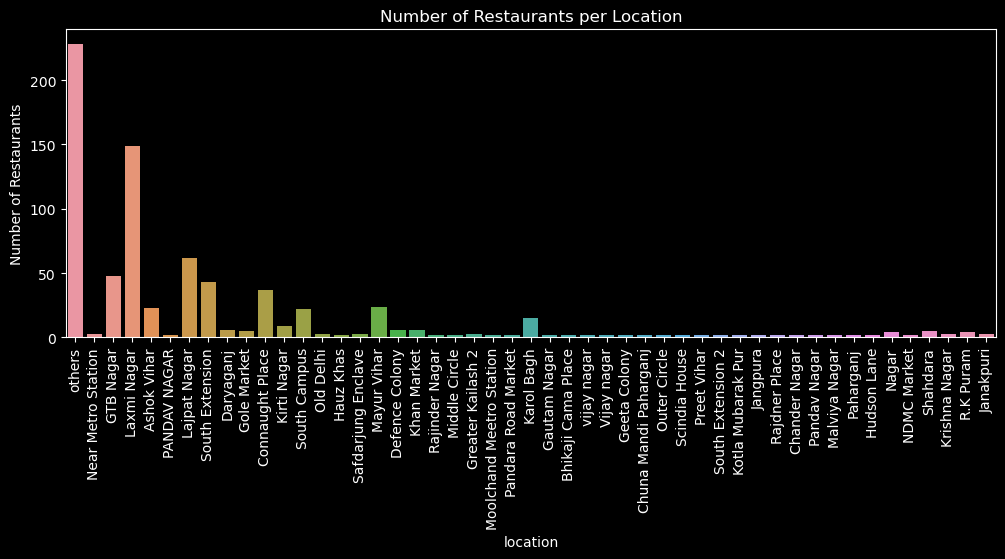

In [40]:
#df['location'].iloc[1:, :]
fig = plt.figure(figsize =(12, 4))
# Horizontal Bar Plot
sns.countplot(x=df["location"])
plt.title('Number of Restaurants per Location')
plt.xlabel('location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

 ## Number of Restaurants per zone

Text(0, 0.5, 'Number of Restaurants')

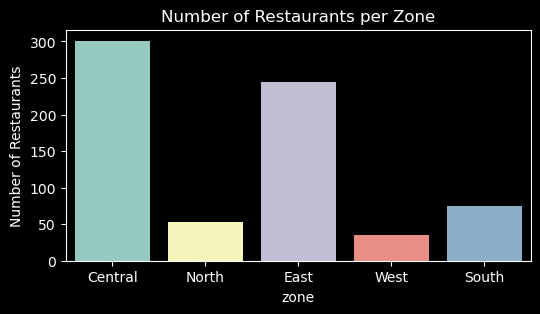

In [41]:
fig = plt.figure(figsize =(6, 3))
 
# Horizontal Bar Plot
sns.countplot(x=df["zone"])
plt.title('Number of Restaurants per Zone')
plt.xlabel('zone')
plt.ylabel('Number of Restaurants')
#plt.xticks(rotation=45)

## Box plot for price per zone 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'North'),
  Text(2, 0, 'East'),
  Text(3, 0, 'West'),
  Text(4, 0, 'South')])

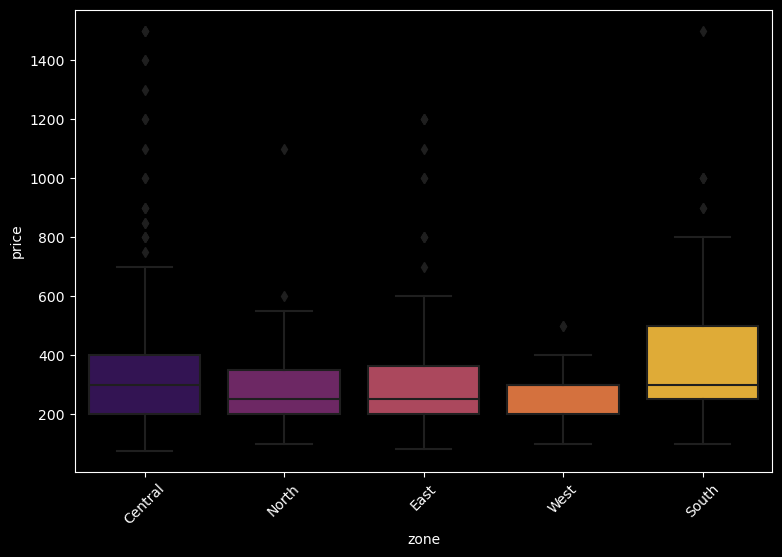

In [42]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'zone', y = 'cost2plates', data = df, palette = 'inferno')
plt.xlabel('zone')
plt.ylabel('price')
plt.xticks(rotation=45)

## Box plot for price per location 

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

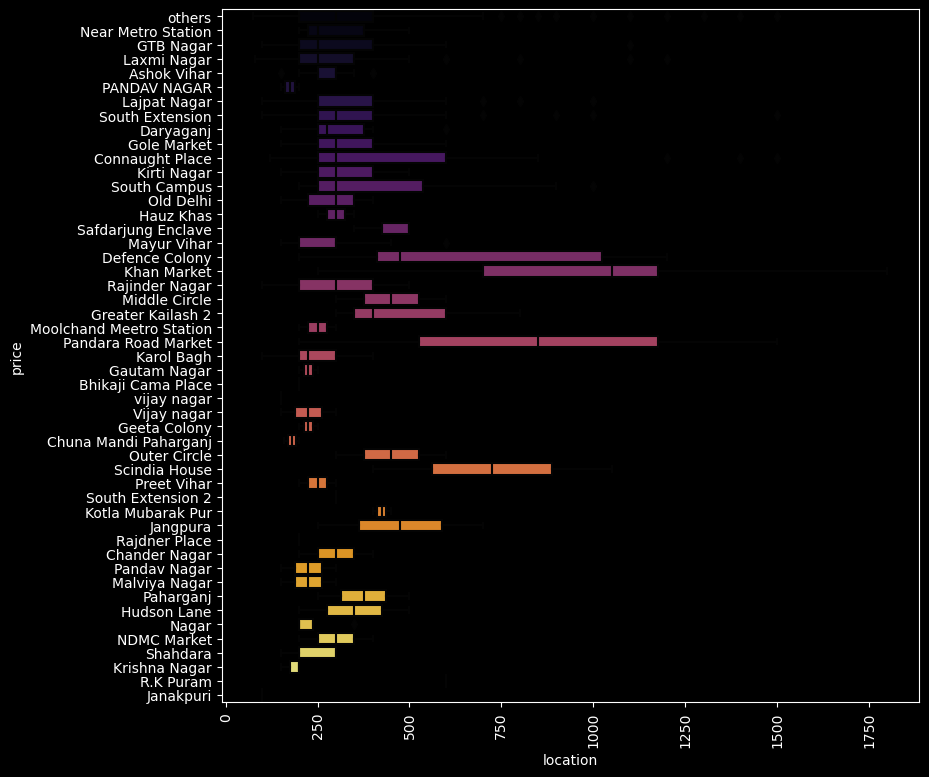

In [43]:
plt.figure(figsize = (9, 9))
sns.boxplot(y = 'location', x = 'cost2plates', data = df, palette = 'inferno')
plt.xlabel('location')
plt.ylabel('price')
plt.xticks(rotation=90)

## Plot for location wise ratings

In [44]:
df4 = df[['location', 'rating']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['rating'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('rating', ascending=False)
df5.head(10)

,rating
location,
others,906.120536
Laxmi Nagar,593.283929
Lajpat Nagar,252.599107
GTB Nagar,189.461607
South Extension,174.266964
Connaught Place,149.800000
Mayur Vihar,92.942857
Ashok Vihar,91.842857
South Campus,89.048214


In [45]:
df5 = df5.iloc[1:, :]
df5.head()

,rating
location,
Laxmi Nagar,593.283929
Lajpat Nagar,252.599107
GTB Nagar,189.461607
South Extension,174.266964
Connaught Place,149.800000


Text(0, 0.5, 'rating')

<Figure size 1500x800 with 0 Axes>

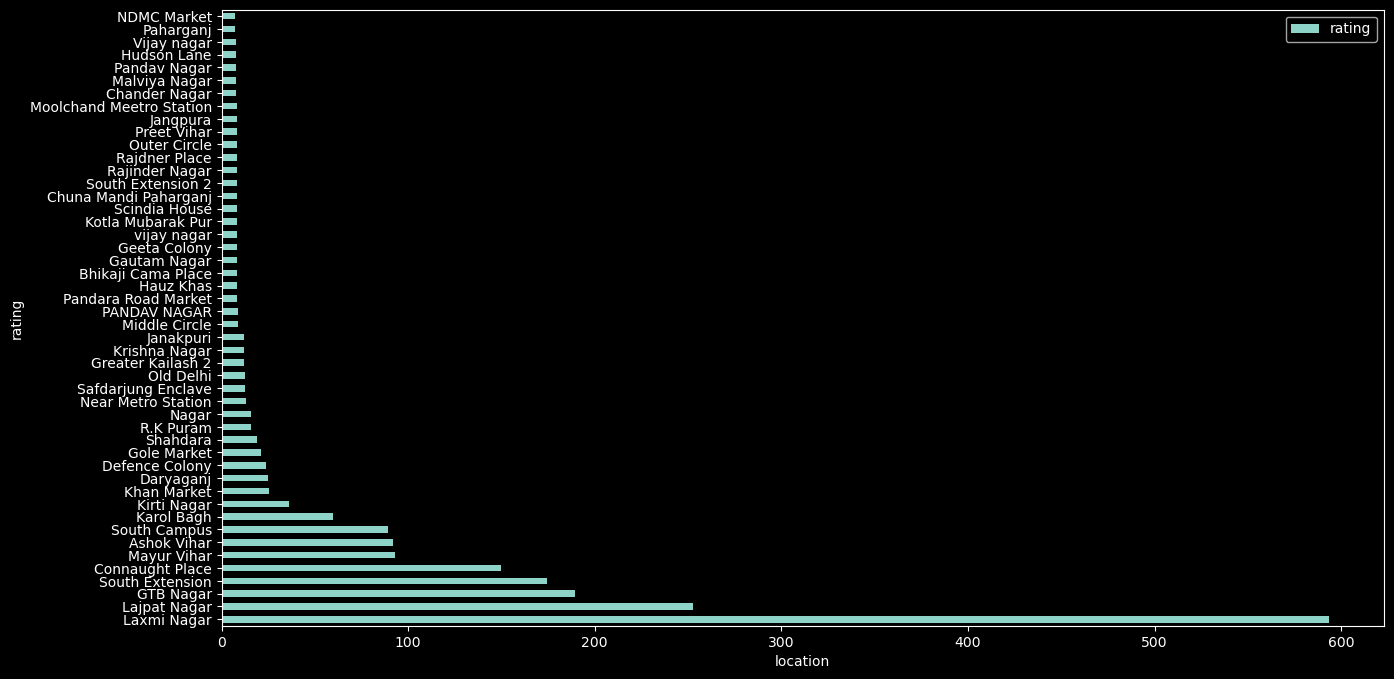

In [46]:
plt.figure(figsize = (15,8))
df5.plot(kind = 'barh', figsize = (15,8))
plt.xlabel('location')
plt.ylabel('rating')
#plt.xticks(rotation = 90)

## Plot for zone wise ratings

In [47]:
df1 = df[['zone', 'rating']]
df1.drop_duplicates()
df2 = df1.groupby(['zone'])['rating'].count()
df2 = df2.to_frame()
df2 = df2.sort_values('rating', ascending=False)
df2.head()

,rating
zone,
Central,301
East,244
South,75
North,53
West,35


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'East'),
  Text(2, 0, 'South'),
  Text(3, 0, 'North'),
  Text(4, 0, 'West')])

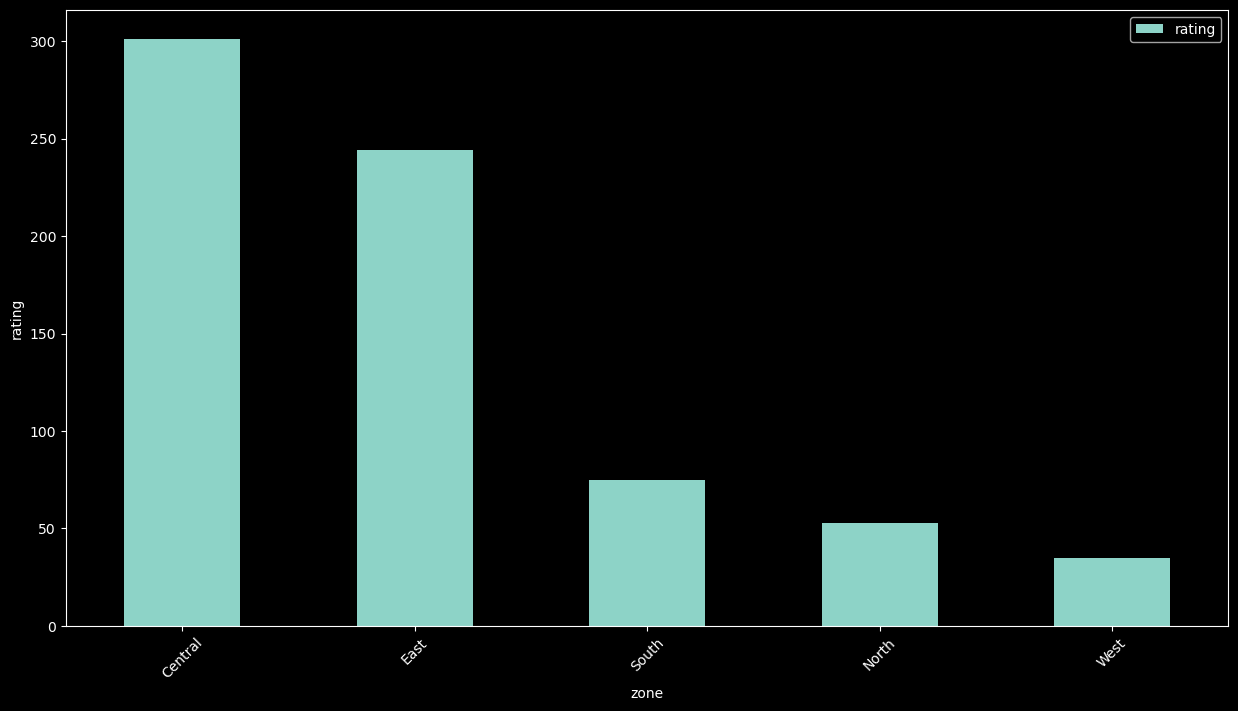

In [48]:
df2.plot(kind = 'bar', figsize = (15,8))
plt.xlabel('zone')
plt.ylabel('rating')
plt.xticks(rotation = 45)

## Visualizing number of ratings on the basis of zone

In [49]:
df7 = df[['zone', 'num_of_rating']]
df7.drop_duplicates()
df8 = df7.groupby(['zone'])['num_of_rating'].sum()
df8 = df8.to_frame()
df8 = df8.sort_values('num_of_rating', ascending=False)
df8.head()

,num_of_rating
zone,
Central,47170
East,8500
South,2910
North,2400
West,1910


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'East'),
  Text(2, 0, 'South'),
  Text(3, 0, 'North'),
  Text(4, 0, 'West')])

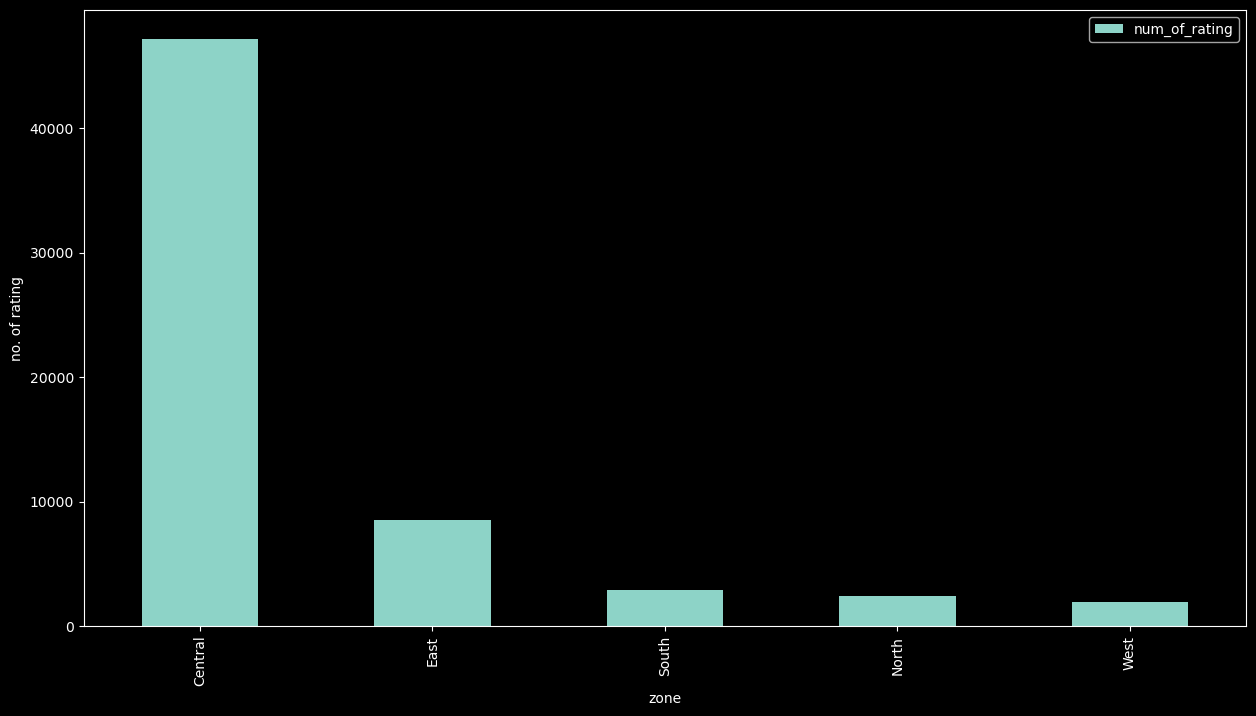

In [50]:
df8.plot(kind = 'bar', figsize = (15,8))
plt.xlabel('zone')
plt.ylabel('no. of rating')
plt.xticks(rotation = 90)

## Visualizing types of restaurants location wise 

In [51]:
df3 = df.groupby(['location','cuisine'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['cuisine'], fill_value=0, aggfunc=np.sum)
df3

name                                     \
cuisine                  Bakery Bakery, Desserts Beverages Biryani   
location                                                             
Ashok Vihar                   0                1         0       0   
Bhikaji Cama Place            0                0         0       0   
Chander Nagar                 0                0         0       0   
Chuna Mandi Paharganj         0                0         0       0   
Connaught Place               0                1         1       0   
Daryaganj                     0                0         0       0   
Defence Colony                0                1         0       0   
GTB Nagar                     0                1         1       0   
Gautam Nagar                  0                0         0       0   
Geeta Colony                  0                0         0       0   
Gole Market                   0                0         0       0   
Greater Kailash 2             0                0         0       0   
Hauz Khas                     0                0         0       0   
Hudson Lane                   0                0         0       0   
Janakpuri                     0                0         0       0   
Jangpura                      0                0         0       0   
Karol Bagh                    0                0         0       1   
Khan Market                   0                1         0       0   
Kirti Nagar                   0                0         1       0   
Kotla Mubarak Pur             0                0         0       0   
Krishna Nagar                 0                0         0       0   
Lajpat Nagar                  0                1         2       1   
Laxmi Nagar                   9                2         0       3   
Malviya Nagar                 0                0         0       0   
Mayur Vihar                   0                2         0       1   
Middle Circle                 0                0         0       0   
Moolchand Meetro Station      0                0         0       0   
NDMC Market                   0                0         0       0   
Nagar                         0                0         0       0   
Near Metro Station            0                0         0       0   
Old Delhi                     0                0         0       0   
Outer Circle                  0                0         0       0   
PANDAV NAGAR                  0                0         0       0   
Paharganj                     0                0         0       0   
Pandara Road Market           0                0         0       0   
Pandav Nagar                  0                0         0       0   
Preet Vihar                   0                0         0       0   
R.K Puram                     0                1         0       0   
Rajdner Place                 0                0         0       0   
Rajinder Nagar                0                0         0       0   
Safdarjung Enclave            0                0         0       0   
Scindia House                 0                0         0       0   
Shahdara                      0                0         0       0   
South Campus                  1                1         1       0   
South Extension               2                2         1       0   
South Extension 2             0                0         0       0   
Vijay nagar                   0                0         1       0   
others                        3                6         4       1   
vijay nagar                   0                0         0       0   

                                                                         \
cuisine                  Biryani, Mughlai Biryani, North Indian Chinese   
location                                                                  
Ashok Vihar                             0                     0       2   
Bhikaji Cama Place                      0                     0       0   
Chander Nag

<Axes: xlabel='location'>

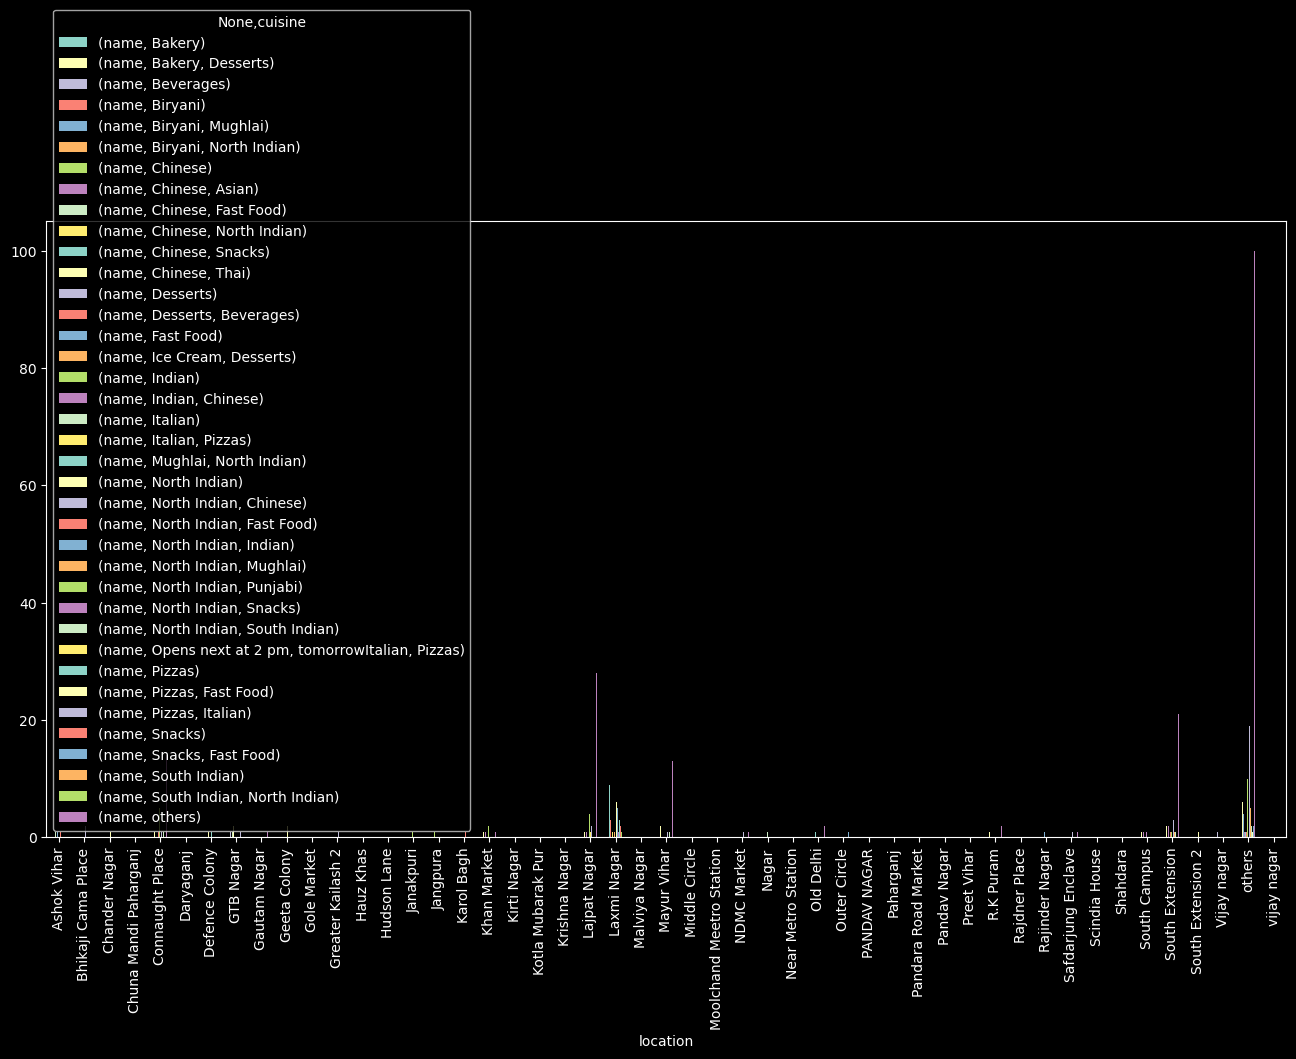

In [52]:
df3.plot(kind = 'bar', figsize = (16,8))

## Visualizing types of restaurants zone wise

In [53]:
df6 = df.groupby(['zone','cuisine'])['name'].count()
df6.to_csv('zone_Type.csv')
df6 = pd.read_csv('zone_Type.csv')
df6 = pd.pivot_table(df6, values=None, index=['zone'], columns=['cuisine'], fill_value=0, aggfunc=np.sum)
df6

name                                                      \
cuisine Bakery Bakery, Desserts Beverages Biryani Biryani, Mughlai   
zone                                                                 
Central      3                7         5       2                5   
East         9                6         2       5                0   
North        0                1         1       0                1   
South        3                4         2       0                0   
West         0                1         1       0                1   

                                                                         \
cuisine Biryani, North Indian Chinese Chinese, Asian Chinese, Fast Food   
zone                                                                      
Central                     1      10              1                  2   
East                        1       1              1                  5   
North                       0       2              0                  1   
South                       3       2              3                  3   
West                        0       2              0                  1   

                               ...                             \
cuisine Chinese, North Indian  ... North Indian, South Indian   
zone                           ...                              
Central                     1  ...                          4   
East                        3  ...                          1   
North                       0  ...                          0   
South                       3  ...                          1   
West                        0  ...                          0   

                                                                              \
cuisine Opens next at 2 pm, tomorrowItalian, Pizzas Pizzas Pizzas, Fast Food   
zone                                                                           
Central                                           0      1                 1   
East                                              5      5                 3   
North                                             0      0                 1   
South                                             0      0                 0   
West                                              0      0                 0   

                                                               \
cuisine Pizzas, Italian Snacks Snacks, Fast Food South Indian   
zone                                                            
Central               2      3                 2            6   
East                  4      3                 2            0   
North                 1      0                 0            0   
South                 1      0                 0            0   
West                  0      0                 0            0   

                                           
cuisine South Indian, North Indian others  
zone                                       
Central                          1    132  
East                             2    106  
North                            1     32  
South                            0     30  
West                             0     11  

[5 rows x 38 columns]

<Axes: xlabel='zone'>

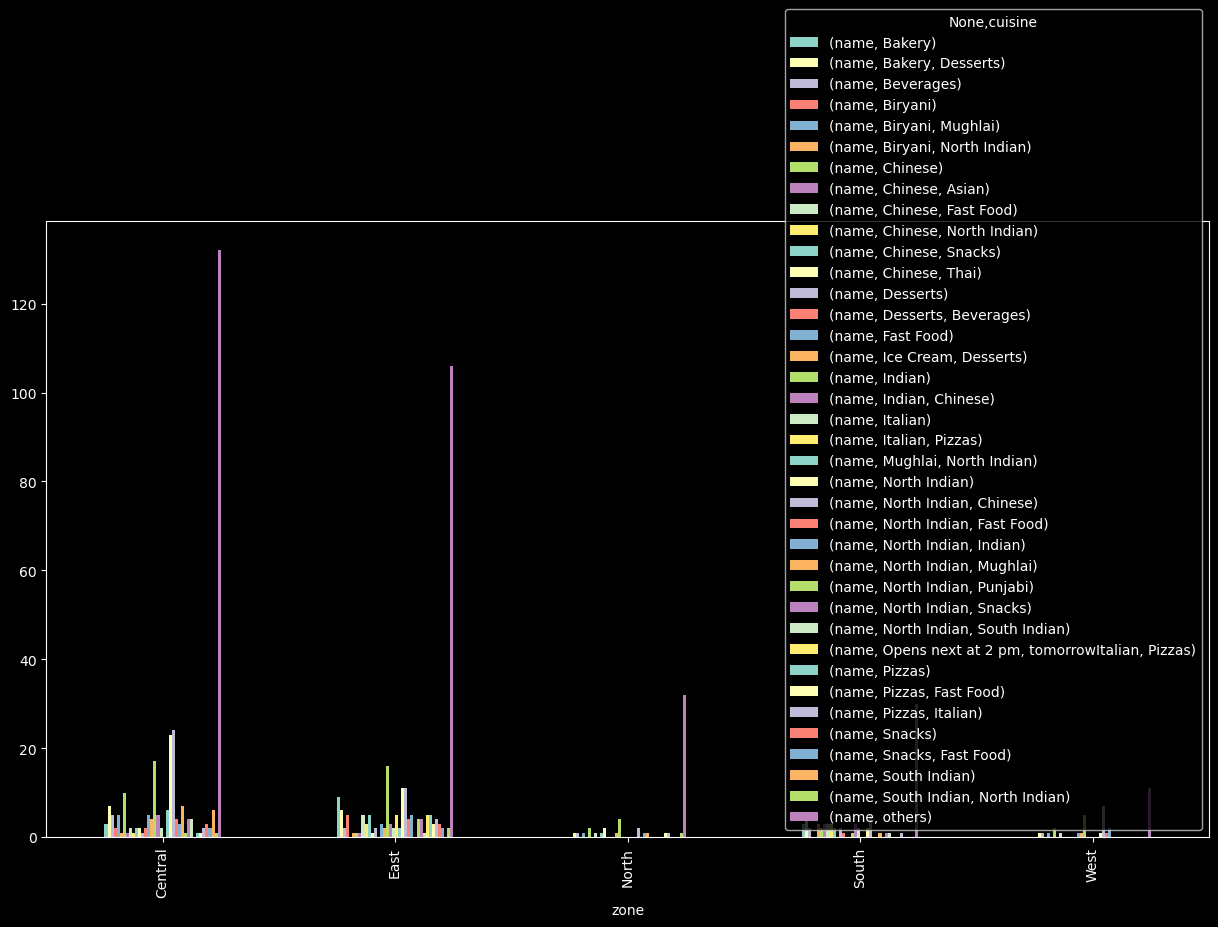

In [54]:
df6.plot(kind = 'bar', figsize = (15,8))

## Visualizing top restaurants based on Ratings

In [55]:
df9 = df[['name', 'rating']]
df9.drop_duplicates()
df10 = df9.groupby(['name'])['rating'].sum()
df10 = df10.to_frame()
df10 = df10.sort_values('rating', ascending=False)
df10.head()

,rating
name,
Love At First Bite,8.005357
Jenny's Brownies,8.005357
Behrouz Biryani - Royal & Safe,4.700000
Momo Maker,4.700000
Triveni Terrace Cafe,4.700000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

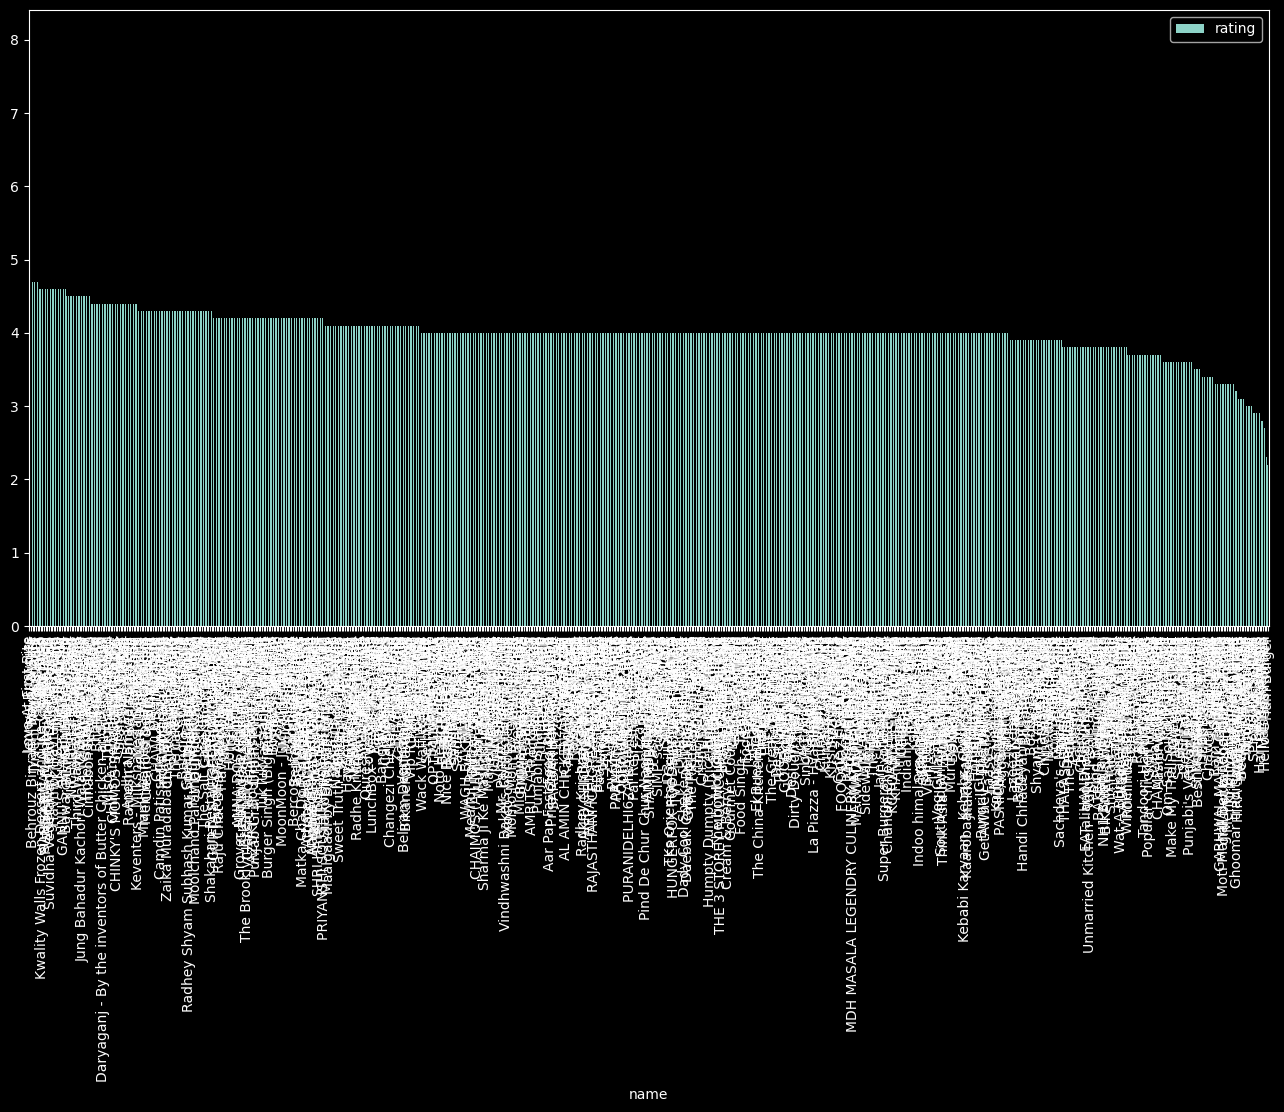

In [56]:
df10.plot(kind = 'bar', figsize = (16,8))
plt.xticks(rotation = 90)

## Visualizing top restaurants based on number of ratings

In [57]:
df11 = df[['name', 'num_of_rating']]
df11.drop_duplicates()
df12 = df11.groupby(['name'])['num_of_rating'].sum()
df12 = df12.to_frame()
df12 = df12.sort_values('num_of_rating', ascending=False)
df12.head()

,num_of_rating
name,
Sita Ram Diwan Chand,1000
Burger King,1000
Shagun,1000
Jhakkas Bombay Pav Bhaji,1000
Bangla Foods,1000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

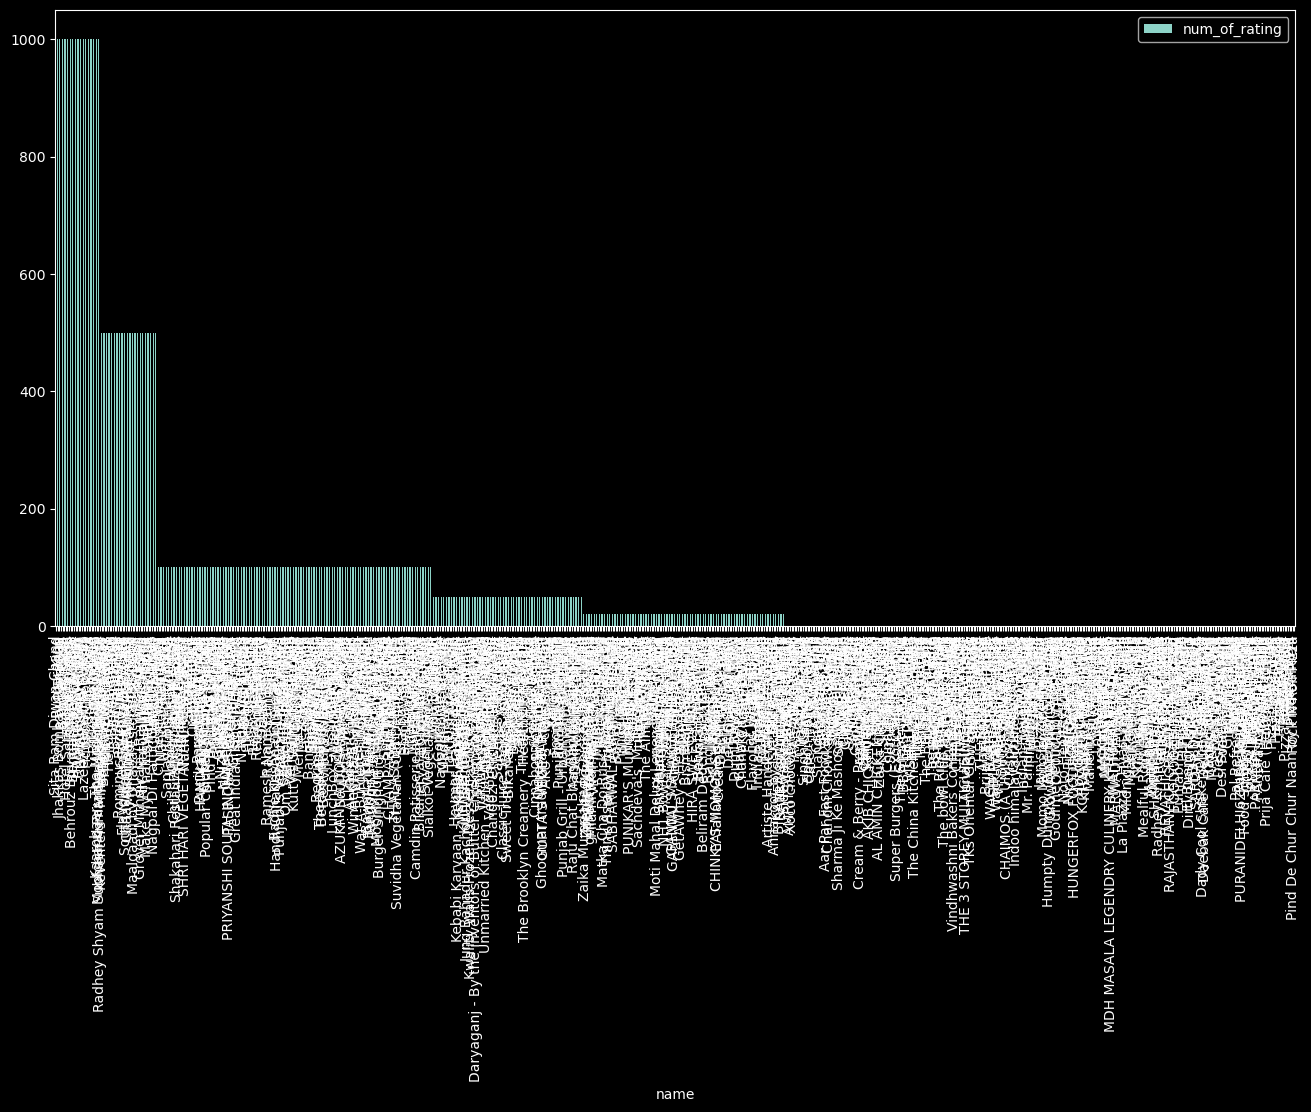

In [58]:
df12.plot(kind = 'bar', figsize = (16,8))
plt.xticks(rotation = 90)